In [2]:
import pandas as pd
import re
import random
from PIL import Image 
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import chart_studio.plotly as py
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk

from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import plotly.io as pio # Plotly renderer
import plotly.graph_objects as go # For plotting plotly graph objects
from plotly.subplots import make_subplots #to make more than one plot in Plotly
from textblob import TextBlob

In [5]:
#!pip install -U kaleido
#!pip install -U textblob
#!pip install -U chart_studio

In [6]:
 #pip install plotly==5.4.0
#!pip install vaderSentiment


In [7]:
#conda install -c plotly plotly=5.4.0

In [8]:
#pip install emot --upgrade

In [3]:
import nltk
##nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('words')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
import textblob
import emot
import re                                  
import string 
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO # For emojis
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer  

In [10]:
df = pd.read_csv("merged_1.csv")
df.shape
df.head(5)

/Users/vishy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,1,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,author_id,created_at,tweet,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.35314E+18,2021-04-28T02:59:50.000Z,Funny we didn’t get a single bump in price out...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_clean = df[["author_id","created_at", "tweet"]]
df_clean.head(5)

,author_id,created_at,tweet
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...
3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...
4,1.35314E+18,2021-04-28T02:59:50.000Z,Funny we didn’t get a single bump in price out...


# Preprocessing data

### We perform the following steps to do preprocessing.
<ol>
  <li>Removing Null Values</li>
  <li>Dropping duplicates records.</li>
  <li>Lowercasing the tweets</li>
  <li>Removing @ and twitter handles</li>
  <li>Removing # symbols </li> 
  <li>Removing Links</li>
  <li>Removing numbers</li>
  <li>Dropping records with some spam words - giveaway, telegram, bot, follow and share, earn free, video</li>
    <li>Tokenization</li>
    <li>Removing stop words</li>
    <li>Removing punctuations</li>
    

</ol>

### 1. Removing null values

In [12]:
df_clean.isna().any() 

author_id     True
created_at    True
tweet         True
dtype: bool

In [13]:
df_clean = df_clean[df_clean['tweet'].notna()]

### 2. Dropping duplicate tweets

In [14]:
df_clean.duplicated(subset='tweet').sum() # Check for duplicate values

11110

In [15]:
df_clean=df_clean.drop_duplicates(subset=['tweet']) # drop duplicate values

### 3. Lowercasing tweets for NLP

In [16]:
df_clean['tweet_processed'] = df.tweet.str.lower() 

In [17]:
df_clean.head(5)

,author_id,created_at,tweet,tweet_processed
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,@cryptunez go doge
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,@cryptoitv @bigimpacthumans great logic. doge ...
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,@iamsierrab ahhh you totally made my day! that...
3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...,@slimjim @billym2k talk about the simplest way...
4,1.35314E+18,2021-04-28T02:59:50.000Z,Funny we didn’t get a single bump in price out...,funny we didn’t get a single bump in price out...


### 4.Removing "@" and usernames

In [18]:
df_clean.tweet_processed = df_clean.tweet_processed.apply(lambda x:  re.sub("@[A-Za-z0-9_]+","", x) )
df_clean.head(10)

,author_id,created_at,tweet,tweet_processed
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic. doge seems to defy logic. i've ...
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh you totally made my day! that was seriou...
3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...,"talk about the simplest way to ""share the we..."
4,1.35314E+18,2021-04-28T02:59:50.000Z,Funny we didn’t get a single bump in price out...,funny we didn’t get a single bump in price out...
5,1.18214E+18,2021-04-28T02:59:49.000Z,@SergioPWolf You're a good doge fren. :3,you're a good doge fren. :3
6,1.3583E+18,2021-04-28T02:59:49.000Z,@Rangers Let me know when i can pay for my tic...,let me know when i can pay for my tickets and...
7,1.33451E+18,2021-04-28T02:59:49.000Z,What is #dogecoin ??,what is #dogecoin ??
8,18819240,2021-04-28T02:59:47.000Z,"@MDF_365 Genuinely don't even know the one, bu...","genuinely don't even know the one, but the vi..."
9,1.17297E+18,2021-04-28T02:59:43.000Z,@gpmominoh @PeteButtigieg I see it as an SNL s...,i see it as an snl sort of thing. it's all i...


### 5.Removing hashtag"#" symbols 

In [19]:
df_clean.tweet_processed = df_clean.tweet_processed.apply(lambda x:  re.sub(r'#', '', x) )

### 6.Removing links

In [20]:
import re,string
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

tests = df_clean["tweet_processed"]
temp = []
for t in tests:
    temp.append(strip_links(t))
df_clean["tweet_processed"] = temp
df_clean.head(10)
    

,author_id,created_at,tweet,tweet_processed
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic. doge seems to defy logic. i've ...
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh you totally made my day! that was seriou...
3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...,"talk about the simplest way to ""share the we..."
4,1.35314E+18,2021-04-28T02:59:50.000Z,Funny we didn’t get a single bump in price out...,funny we didn’t get a single bump in price out...
5,1.18214E+18,2021-04-28T02:59:49.000Z,@SergioPWolf You're a good doge fren. :3,you're a good doge fren. :3
6,1.3583E+18,2021-04-28T02:59:49.000Z,@Rangers Let me know when i can pay for my tic...,let me know when i can pay for my tickets and...
7,1.33451E+18,2021-04-28T02:59:49.000Z,What is #dogecoin ??,what is dogecoin ??
8,18819240,2021-04-28T02:59:47.000Z,"@MDF_365 Genuinely don't even know the one, bu...","genuinely don't even know the one, but the vi..."
9,1.17297E+18,2021-04-28T02:59:43.000Z,@gpmominoh @PeteButtigieg I see it as an SNL s...,i see it as an snl sort of thing. it's all i...


### 7.Removing single digit numbers

In [21]:
df_clean.tweet_processed  =    df_clean.tweet_processed.apply(lambda x: re.sub(r'[0-9]', '', x) ) # removing single digit numbers 

In [22]:
df_clean.head(8)

,author_id,created_at,tweet,tweet_processed
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic. doge seems to defy logic. i've ...
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh you totally made my day! that was seriou...
3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...,"talk about the simplest way to ""share the we..."
4,1.35314E+18,2021-04-28T02:59:50.000Z,Funny we didn’t get a single bump in price out...,funny we didn’t get a single bump in price out...
5,1.18214E+18,2021-04-28T02:59:49.000Z,@SergioPWolf You're a good doge fren. :3,you're a good doge fren. :
6,1.3583E+18,2021-04-28T02:59:49.000Z,@Rangers Let me know when i can pay for my tic...,let me know when i can pay for my tickets and...
7,1.33451E+18,2021-04-28T02:59:49.000Z,What is #dogecoin ??,what is dogecoin ??


### 8.Dropping records with some spam words - giveaway, telegram, bot, follow and share, earn free, video

In [23]:
df_clean.shape

(104275, 4)

In [24]:
df_clean = df_clean[~df_clean.tweet.str.contains("bot")]
df_clean = df_clean[~df_clean.tweet.str.contains("telegram")]
df_clean = df_clean[~df_clean.tweet.str.contains("giveaway")]
df_clean =  df_clean[~df_clean.tweet.str.contains("earn free")]
df_clean = df_clean[~df_clean.tweet.str.contains("video")]
df_clean = df_clean[~df_clean.tweet.str.contains("follow and share")]


In [25]:
df_clean.shape

(102091, 4)

### 9. Tokenization 

In [26]:
print('Before Tokenizing: ')
df_clean.head(3)

Before Tokenizing: 


,author_id,created_at,tweet,tweet_processed
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic. doge seems to defy logic. i've ...
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh you totally made my day! that was seriou...


In [27]:
# instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
# tokenize the tweets
df_clean["tokenized"] = df_clean["tweet_processed"].apply(nltk.word_tokenize)
print('\nTokenized strings:')
df_clean.head(3)


Tokenized strings:


,author_id,created_at,tweet,tweet_processed,tokenized
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge,"[go, doge]"
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic. doge seems to defy logic. i've ...,"[great, logic, ., doge, seems, to, defy, logic..."
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh you totally made my day! that was seriou...,"[ahhh, you, totally, made, my, day, !, that, w..."


## 10.Remove stop words 

In [28]:
#Import the english stop words list from NLTK
stopwords = stopwords.words("english")

In [29]:
print('Before Removing stop words')
df_clean.head(4)

Before Removing stop words


,author_id,created_at,tweet,tweet_processed,tokenized
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge,"[go, doge]"
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic. doge seems to defy logic. i've ...,"[great, logic, ., doge, seems, to, defy, logic..."
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh you totally made my day! that was seriou...,"[ahhh, you, totally, made, my, day, !, that, w..."
3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...,"talk about the simplest way to ""share the we...","[talk, about, the, simplest, way, to, ``, shar..."


In [30]:
df_clean["tweet_processed"] = df_clean["tokenized"].apply(lambda x: ' '.join([word for word in x if word not in (stopwords)]))

### 11.Removing Punctuations

In [31]:
df_clean["tweet_processed"] = df_clean["tweet_processed"].apply(lambda x: "".join([word for word in x if word not in string.punctuation]))#Test_punc_removed = [char for char in message if char not in string.punctuation]

In [32]:
# Function to remove punctuations and emojis
emojis = list(UNICODE_EMOJI.keys())
def remove_emoji(tweet):
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in emojis]
    return " ".join(filtered_words)  # join words with a space in between them

def remove_punct(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

df_clean['tweet_processed'] = df_clean['tweet_processed'].str.replace("[^a-zA-Z#!]", " ")
df_clean.head()

<ipython-input-32-e6a0fc972316>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['tweet_processed'] = df_clean['tweet_processed'].str.replace("[^a-zA-Z#!]", " ")


,author_id,created_at,tweet,tweet_processed,tokenized
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge,"[go, doge]"
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic doge seems defy logic ve stopped...,"[great, logic, ., doge, seems, to, defy, logic..."
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh totally made day seriously nice loved ...,"[ahhh, you, totally, made, my, day, !, that, w..."
3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...,talk simplest way share wealth investing dog...,"[talk, about, the, simplest, way, to, ``, shar..."
4,1.35314E+18,2021-04-28T02:59:50.000Z,Funny we didn’t get a single bump in price out...,funny get single bump price doge,"[funny, we, didn, ’, t, get, a, single, bump, ..."


In [33]:
df_clean['tweet_processed'] = df_clean['tweet_processed'].apply(remove_emoji)

In [34]:
df_clean['tweet_processed'] = df_clean['tweet_processed'].apply(remove_punct)

In [35]:
df_clean.head(3)

,author_id,created_at,tweet,tweet_processed,tokenized
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge,"[go, doge]"
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic doge seems defy logic ve stopped t...,"[great, logic, ., doge, seems, to, defy, logic..."
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh totally made day seriously nice loved dog...,"[ahhh, you, totally, made, my, day, !, that, w..."


In [36]:
# instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
# tokenize the tweets
df_clean["tokenized"] = df_clean["tweet_processed"].apply(nltk.word_tokenize)
print('\nTokenized strings:')
df_clean.head(3)


Tokenized strings:


,author_id,created_at,tweet,tweet_processed,tokenized
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge,"[go, doge]"
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic doge seems defy logic ve stopped t...,"[great, logic, doge, seems, defy, logic, ve, s..."
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh totally made day seriously nice loved dog...,"[ahhh, totally, made, day, seriously, nice, lo..."


### 12. Stemming the data

In [37]:
# Tokenize Data
tokenize_tweets = df_clean['tweet_processed'].apply(lambda x: x.split()) 
tokenize_tweets.head(10)

0                                           [go, doge]
1    [great, logic, doge, seems, defy, logic, ve, s...
2    [ahhh, totally, made, day, seriously, nice, lo...
3    [talk, simplest, way, share, wealth, investing...
4              [funny, get, single, bump, price, doge]
5                               [re, good, doge, fren]
6       [let, know, pay, tickets, boomstick, dogecoin]
7                                           [dogecoin]
8    [genuinely, nt, even, know, one, vids, ve, com...
9    [see, snl, sort, thing, s, good, humor, pete, ...
Name: tweet_processed, dtype: object

In [38]:
stemmer = PorterStemmer()

tokenize_tweets = tokenize_tweets.apply(lambda x: [stemmer.stem(i) for i in x])
tokenize_tweets.head(10)

0                                           [go, doge]
1    [great, logic, doge, seem, defi, logic, ve, st...
2    [ahhh, total, made, day, serious, nice, love, ...
3    [talk, simplest, way, share, wealth, invest, d...
4               [funni, get, singl, bump, price, doge]
5                               [re, good, doge, fren]
6        [let, know, pay, ticket, boomstick, dogecoin]
7                                           [dogecoin]
8    [genuin, nt, even, know, one, vid, ve, come, a...
9    [see, snl, sort, thing, s, good, humor, pete, ...
Name: tweet_processed, dtype: object

## Using Get adjectives function

In [39]:
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [40]:
df_clean['Tweet_adj'] = 0
df_clean['Tweet_adj'] = df_clean['tweet_processed'].apply(getAdjectives)

In [41]:
df_clean.dropna(subset=['tweet_processed','Tweet_adj'])

,author_id,created_at,tweet,tweet_processed,tokenized,Tweet_adj
0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge,"[go, doge]",
1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic doge seems defy logic ve stopped t...,"[great, logic, doge, seems, defy, logic, ve, s...",great logic defy logic wild
2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh totally made day seriously nice loved dog...,"[ahhh, totally, made, day, seriously, nice, lo...",nice doge
3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...,talk simplest way share wealth investing doge ...,"[talk, simplest, way, share, wealth, investing...",ish
4,1.35314E+18,2021-04-28T02:59:50.000Z,Funny we didn’t get a single bump in price out...,funny get single bump price doge,"[funny, get, single, bump, price, doge]",funny single
...,...,...,...,...,...,...
115379,1371310000000000000.0,2021-05-07T00:54:36.000Z,PROFIT! Just bagged 2.81% on a $TRX trade!\n11...,profit bagged trx trade z hold doge tothemoon ...,"[profit, bagged, trx, trade, z, hold, doge, to...",trx doge snl ath david
115380,1371310000000000000.0,2021-05-07T00:54:35.000Z,PROFIT! Just bagged 4.4% on a $BTT trade!\n116...,profit bagged btt trade z success doge kind au...,"[profit, bagged, btt, trade, z, success, doge,...",btt snl twitter
115381,1361230000000000000.0,2021-05-07T00:54:35.000Z,"💰10,846,051 #DOGE (6,302,940 USD) move from un...",doge usd move unknown wallet unknown wallet z ...,"[doge, usd, move, unknown, wallet, unknown, wa...",usd unknown unknown entire
115385,1184200000000000000.0,2021-05-07T00:54:31.000Z,@MattZeitlin @DKThomp @dogecoin @Bitcoin @ethe...,value cryptocurrencies based faith dollar exce...,"[value, cryptocurrencies, based, faith, dollar...",faith faith safe


In [42]:
df_clean.to_csv('event1_processed.csv') 

In [43]:
df_clean = pd.read_csv("event1_processed.csv")
df_clean.head(5)

,Unnamed: 0,author_id,created_at,tweet,tweet_processed,tokenized,Tweet_adj
0,0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge,"['go', 'doge']",NaN
1,1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic doge seems defy logic ve stopped t...,"['great', 'logic', 'doge', 'seems', 'defy', 'l...",great logic defy logic wild
2,2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh totally made day seriously nice loved dog...,"['ahhh', 'totally', 'made', 'day', 'seriously'...",nice doge
3,3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...,talk simplest way share wealth investing doge ...,"['talk', 'simplest', 'way', 'share', 'wealth',...",ish
4,4,1.35314E+18,2021-04-28T02:59:50.000Z,Funny we didn’t get a single bump in price out...,funny get single bump price doge,"['funny', 'get', 'single', 'bump', 'price', 'd...",funny single


In [44]:
common_words = ["doge","dogecoin","elon","elonmusk","musk","snl","unknown","coin","crypto","like","wallet","project","en","usd","people","nt","s","NaN",'nan',"cryptocurrency","one","amp","would","via","going","z","xrp","bnb","price","time","money"]
f = lambda x: ' '.join(w for w in x.split() if not w in common_words)
df_clean['tweet_processed'] = df_clean['tweet_processed'].astype('str').apply(f)
# instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
# tokenize the tweets
df_clean["tokenized"] = df_clean["tweet_processed"].apply(nltk.word_tokenize)

## Data Exploration

In [45]:
''''df_clean.head(10)
df_clean = df_clean[~df_clean.tweet.str.contains("doge")]
df_clean = df_clean[~df_clean.tweet.str.contains("dogecoin")]
df_clean = df_clean[~df_clean.tweet.str.contains("elon")]
df_clean = df_clean[~df_clean.tweet.str.contains("elonmusk")]
df_clean = df_clean[~df_clean.tweet.str.contains("musk")]
df_clean = df_clean[~df_clean.tweet.str.contains("snl")]
#df_clean = df_clean[~df_clean.tweet.str.contains("moon")]'''

'\'df_clean.head(10)\ndf_clean = df_clean[~df_clean.tweet.str.contains("doge")]\ndf_clean = df_clean[~df_clean.tweet.str.contains("dogecoin")]\ndf_clean = df_clean[~df_clean.tweet.str.contains("elon")]\ndf_clean = df_clean[~df_clean.tweet.str.contains("elonmusk")]\ndf_clean = df_clean[~df_clean.tweet.str.contains("musk")]\ndf_clean = df_clean[~df_clean.tweet.str.contains("snl")]\n#df_clean = df_clean[~df_clean.tweet.str.contains("moon")]'

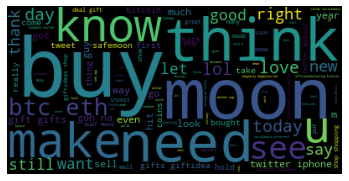

In [46]:
wordcloud1 = WordCloud().generate(' '.join(df_clean['tweet_processed'].astype("str")))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()
wordcloud1.to_file('wordcloud_event1.png')

In [47]:
# Import doge image
image = np.array(Image.open('doge3.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

#plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
#plt.axis('off') # Remove axis
#plt.show() # Display image

<Figure size 1008x1296 with 0 Axes>

In [48]:
# Create function to generate the blue colour for the Word CLoud
def Yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(23, 97%%, %d%%)" % random.randint(50, 70)


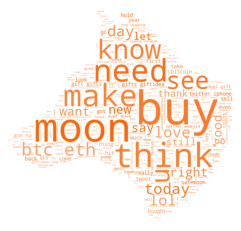

In [49]:
wordcloud1 = WordCloud(background_color='white', max_words=1500, mask=image)
wordcloud1 = wordcloud1.generate(' '.join(df_clean['tweet_processed']))
wordcloud1 = wordcloud1.recolor(color_func=Yellow_color_func, random_state=3)
plt.imshow(wordcloud1)
plt.axis("off")
plt.savefig('doge_event1_wordcloud.png')

## Analyzing Top Words in the Word Cloud

In [50]:
# Combine all words into a list
tweets_long_string = df_clean['tweet_processed'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [51]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)

In [52]:
df.head(10)

,Words,Count
103,bitcoin,6881
32,buy,5962
101,btc,5663
39,get,5216
20,moon,5062
521,twitter,4794
124,dogearmy,4706
225,eth,4554
113,dogecointothemoon,4170
0,go,4046


### Top 10 Words in Twitter Users views about crypto currency during Musk's Tweet

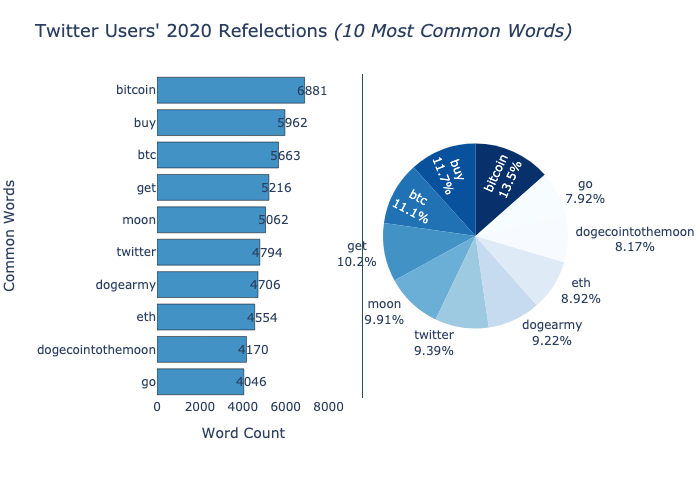

In [53]:
# print(px.colors.sequential.Blues_r) to get the colour list used here. Please note, I swatched some colours

# Define my colours for the Plotly Plot
colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = df['Count'].head(10), y=df['Words'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=df['Words'].head(10),values=df['Count'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="Twitter Users' 2020 Refelections <i>(10 Most Common Words)</i>",
                  font=dict(size=18, )))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Words', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Word Count', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(0,0,0,0)',
                             plot_bgcolor='rgba(0,0,0,0)')

# Specify X and Y values for Annotations
x = df['Count'].head(10).to_list()
y = df['Words'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show(renderer = 'png')

In [ ]:
# Hashtags mentions
df_clean = pd.read_csv("event1_processed.csv")
df_clean.head()
df_clean.columns
df_clean = df_clean.rename(columns={'tweet':'tweet'})
df_clean["tweet"] = df_clean.tweet.str.lower() 
def hashtag_extract(x):
  hashtags = []
  
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
    
  return hashtags

# Extract hashtags
#df_clean["tweet"] = df.tweet.str.lower() 
hashtags = hashtag_extract(df_clean["tweet"])

# Unnesting list

hashtags = sum(hashtags, [])
# Frequency Distribution

freq_dist = nltk.FreqDist(hashtags)

graph = pd.DataFrame({'Hashtag': list(freq_dist.keys()), 'Count': list(freq_dist.values())})

# Top 10 Most Frequent Hashtags

graph = graph.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
axis = sns.barplot(data=graph, x="Hashtag", y="Count")
axis.set(ylabel='Count')
plt.title('Most Frequent Hashtags')
plt.show()

## Sentiment Analysis

In [ ]:
# Create function to obtain Subjectivity Score
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Create function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
# function to return words to their base form using Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [ ]:
df_clean["Tweets_Sentiments"] = df_clean["tokenized"].astype("str").apply(preprocessTweetsSentiments)

In [ ]:
# Apply all functions above to respective columns
#df_clean['Tweets_Sentiments'] = 0
df_clean['Polarity'] = 0
df_clean['Sentiment'] = 0
df_clean['Subjectivity']=df_clean['Tweets_Sentiments'].astype('str').apply(getSubjectivity)
df_clean['Polarity']=df_clean['Tweets_Sentiments'].astype('str').apply(getPolarity)
df_clean['Sentiment']=df_clean['Polarity'].apply(getSentimentTextBlob)

In [ ]:
# See quick results of the Sentiment Analysis
df_clean['Sentiment'].value_counts()

In [ ]:
# Create dataframe for Count of Sentiment Categories
bar_chart = df_clean['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [ ]:
bar_chart # Display dataframe

In [ ]:
sentiments_barchart = px.bar(bar_chart, x = 'Sentiment', y='Total Tweets', color='Sentiment')

sentiments_barchart.update_layout(title='Distribution of Sentiments Results',
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})

sentiments_barchart.show(renderer = 'png') #Display plot. 


In [ ]:
df_clean.head() # Check dataframe first 5 rows

### Using Vader

In [4]:
df_clean = pd.read_csv("event1_processed.csv")
df_clean.head()
df_clean.columns

Index(['Unnamed: 0', 'author_id', 'created_at', 'tweet', 'tweet_processed',
       'tokenized', 'Tweet_adj'],
      dtype='object')

In [5]:
# Calculate Polarity

analyser = SentimentIntensityAnalyzer()

scores = []
for sentence in df_clean["tweet_processed"].astype("str"):
  score = analyser.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

df_clean['Compound'] = scores['compound']
df_clean['Negative'] = scores['neg']
df_clean['Neutral'] = scores['neu']
df_clean['Positive'] = scores['pos']
df_clean.head()

,Unnamed: 0,author_id,created_at,tweet,tweet_processed,tokenized,Tweet_adj,Compound,Negative,Neutral,Positive
0,0,22055866,2021-04-28T02:59:57.000Z,@cryptunez Go doge,go doge,"['go', 'doge']",NaN,0.0000,0.000,1.000,0.000
1,1,184854868,2021-04-28T02:59:57.000Z,@CryptoITV @BigImpactHumans Great logic. Doge ...,great logic doge seems defy logic ve stopped t...,"['great', 'logic', 'doge', 'seems', 'defy', 'l...",great logic defy logic wild,0.4939,0.106,0.667,0.228
2,2,4053658573,2021-04-28T02:59:56.000Z,@iamSierraB Ahhh you totally made my day! That...,ahhh totally made day seriously nice loved dog...,"['ahhh', 'totally', 'made', 'day', 'seriously'...",nice doge,0.6943,0.105,0.536,0.359
3,3,223001547,2021-04-28T02:59:54.000Z,@SlimJim @BillyM2k Talk about the simplest way...,talk simplest way share wealth investing doge ...,"['talk', 'simplest', 'way', 'share', 'wealth',...",ish,0.8442,0.061,0.480,0.459
4,4,1.35314E+18,2021-04-28T02:59:50.000Z,Funny we didn’t get a single bump in price out...,funny get single bump price doge,"['funny', 'get', 'single', 'bump', 'price', 'd...",funny single,0.4404,0.000,0.633,0.367


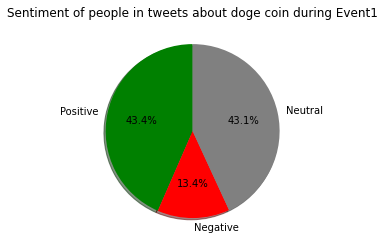

In [8]:
from collections import Counter
sid = SentimentIntensityAnalyzer()
l = []
counter = Counter()
for data in df_clean["tweet_processed"].astype("str"):
    ss = sid.polarity_scores(data)
    l.append(ss)
    k = ss['compound']
    if k >= 0.05:
        counter['positive'] += 1
    elif k <= -0.05:
        counter['negative'] += 1
    else:
        counter['neutral'] += 1

positive = counter['positive']
negative = counter['negative']
neutral = counter['neutral']

colors = ['green', 'red', 'grey']
sizes = [positive, negative, neutral]
labels = 'Positive', 'Negative', 'Neutral'

# use matplotlib to plot the chart
plt.pie(
    x=sizes,
    shadow=True,
    colors=colors,
    labels=labels,
    startangle=90,
    autopct='%.1f%%'
)

plt.title("Sentiment of people in tweets about doge coin during Event1")
plt.show()